Send this ipynb file with your code (solution) to econometrics.methods@gmail.com

In the subject of the e-mail, copy and paste only the title of this file without the extension ".ipynb"

Write the name of the members of your group in the e-mail, and not here.

Only one student will send me the solution. This student is responsible to copy other members of the group in the e-mail. 


In [0]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Topics to go over: 
    - Joins
        - Implementation
    - Iteration
        - Comparison/Booleans
        - Random Selection
        - Control Statements

# The Incumbency Effect
The following table contains data about every congressional representative from the 50 states (DC is not included) from 1995 onward. If an entry contains "nan" it means that there is no entry (i.e. a middlename of "nan" means the congressman or woman had no middle name).

In [2]:
path ='https://github.com/VitorKamada/DataScience/raw/master/Labs/Data/'
congress = Table().read_table(path + "congress-terms-since1995.csv").drop(2,6,13,14).where("incumbent", are.not_equal_to("nan"))
true_date = make_array()
for i in congress.column("termstart"):
     true_date = np.append(true_date, int(i[:-5:-1][::-1]))
congress = congress.with_column(
    "Term Start", true_date).drop("termstart")
congress

congress,chamber,firstname,middlename,lastname,birthday,state,party,incumbent,age,Term Start
104,house,Sidney,Richard,Yates,8/27/1909,IL,D,Yes,85.4,1995
104,house,James,Henry,Quillen,1/11/1916,TN,R,Yes,79,1995
104,house,Henry,Barbosa,González,5/3/1916,TX,D,Yes,78.7,1995
104,house,Sam,Melville,Gibbons,1/20/1920,FL,D,Yes,75,1995
104,house,George,E.,Brown,3/6/1920,CA,D,Yes,74.8,1995
104,house,Gillespie,V.,Montgomery,8/5/1920,MS,D,Yes,74.4,1995
104,house,Tom,nan,Bevill,3/27/1921,AL,D,Yes,73.8,1995
104,house,Barbara,Farrell,Vucanovich,6/22/1921,NV,R,Yes,73.5,1995
104,house,Carlos,John,Moorhead,5/6/1922,CA,R,Yes,72.7,1995
104,house,Benjamin,nan,Gilman,12/6/1922,NY,R,Yes,72.1,1995


# Question 1.1:
Often times people who've already served in office are said to have an incumbency advantage: an advantage that comes from having prior experience, a well known name, and franking priviledges (they can send mail without paying postage). But just how big is this supposed advantage? Is there an advantage?

In the cell below find out what proportion of representatives have been incumbents since 1995.

In [0]:
prop_incumbents = 
prop_incumbents

SyntaxError: invalid syntax (<ipython-input-4-143ed0d377dd>, line 1)

# Question 1.2
Of course the House and the Senate differ in many ways, from term lengths, to number of representatives, to jurisdiction of powers. Does one chamber have a higher incidence of incumbent advantage that the other?

In [0]:
# house and senate are tables that only have data about their respective chambers 
house = 
senate = 

prop_incumbents_house = 
prop_incumbents_senate = 

print("Proportion of House who have been incumbents:", prop_incumbents_house)
print("Proportion of Senate who have been incumbents:", prop_incumbents_senate)

SyntaxError: invalid syntax (<ipython-input-5-0f2e5157c3ca>, line 2)

So it would seem that the senate, at least since 1995, has had a more pronounced incumbency effect. I encourage you to think about why this may be

# Parties of Congressional Representatives
Next, we are going to find what proportion of each state's representatives, since 1995, have been Republican or Democrat. Eventually, we're going to use that information to build a map.

First, let's see how the composition of each chamber Congress has changed since 1995.

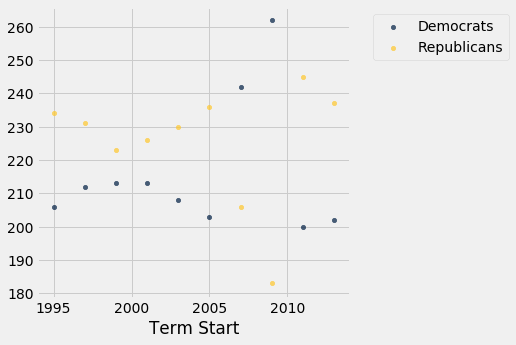

In [3]:
#run cell
house_plot = congress.where("chamber", "house").pivot("party", "Term Start").select("Term Start", "D", "R")\
.relabeled("D", "Democrats").relabeled("R", "Republicans").scatter(0)
house_plot

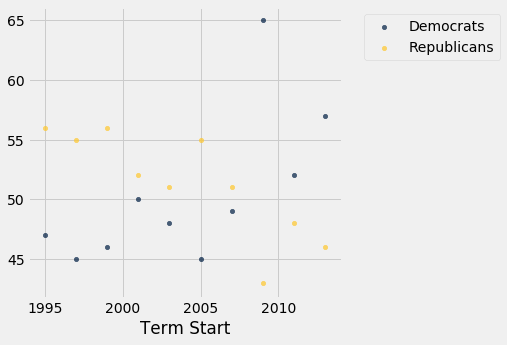

In [4]:
#run cell
senate_plot = congress.where("chamber", "senate").pivot("party", "Term Start").select("Term Start", "D", "R")\
.relabeled("D", "Democrats").relabeled("R", "Republicans").scatter(0)
senate_plot

Obviously, the composition of congress has changed dramatically over the past few years. For the sake of simplicity, we'll only be looking at the overall proportion of democratic versus republican representatives a state has had in the given time.

The following cell creates a table called states that associates each state with the latitude and longitude of one of it's cities (for our purposes it doesn't matter which city it is, so long as the coordinates correspond with a point within each State's borders).

In [5]:
#run cell
path ='https://github.com/VitorKamada/DataScience/raw/master/Labs/Data/'
abbreviations = Table().read_table(path + "State_names_w_abbreviations.csv")
states_w_cities = Table.read_table(path + "zip_codes_states.csv").where(
    "latitude", are.between_or_equal_to(0.01,360))
states = abbreviations.join("Abbreviation", states_w_cities, "state").drop(2,5,6)
states

Abbreviation,US State,latitude,longitude
AK,Alaska,61.2876,-149.487
AK,Alaska,61.1661,-149.96
AK,Alaska,61.1884,-149.894
AK,Alaska,61.2053,-149.772
AK,Alaska,61.2591,-149.69
AK,Alaska,61.2574,-149.804
AK,Alaska,61.1519,-149.776
AK,Alaska,61.2051,-149.823
AK,Alaska,61.1089,-149.44
AK,Alaska,61.1446,-149.878


# Question 2.1
Now that we have a table with congressional data and one with coordinates associated with each state, it will be of some use to us to join the 2 tables. 
Use the .join method to create a new table that has a row for every representative and has all of the old congressional data PLUS the new longitude and latitude data. 
(Remember, the order you use .join matters. congress.join(-arguments-) is not the same as states.join(-arguments-)!!)

In [0]:
combined = 
combined

SyntaxError: invalid syntax (<ipython-input-9-f54882f2eb59>, line 1)

# Making Comparisons

In [6]:
path ='https://github.com/VitorKamada/DataScience/raw/master/Labs/Data/'
actors = Table.read_table(path + 'actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


1.1 Find the number of actors whose number of movies are greater than 50 by using the table method ".where".

In [0]:
...

Ellipsis

1.2 Find the number of actors whose number of movies are greater than 50 without using the table method ".where".

In [0]:
...

Ellipsis

# Conditional Statement Review

Chained Conditional Statement

if x < y:

    STATEMENTS_A
    
elif x > y:

    STATEMENTS_B
    
else:

    STATEMENTS_C

Nested Conditional Statement

if x < y:

    STATEMENTS_A
    
else:

    if x > y:
    
        STATEMENTS_B
        
    else:
    
        STATEMENTS_C

2.1 Write a function that take in a string username and a string password and verify if the username and password match with the provided information.

In [0]:
myusername = "aliceinwonderland"
mypassword = "ilovenutella"

def verify(username, password):
    #if the username is not correct, print out an error message "No user found"
    
    #if the username is correct but the password is not, 
    #print out an error message "The password entered is not correct"
    
    #if both the username and password are correct, print out "Welcome back!"
    ...

In [0]:
# run verify(myusername, mypassword) to see if you implement the function correctly
verify(myusername, mypassword)

# Iteration

3.1 Write a function that takes in a list of numbers and prints out all the negative numbers from the list.

In [0]:
def printnegative(mylist):
    ...

In [0]:
#verify if the function above behaves correctly
mylist = make_array(1,-1,4,0,-7,-12,3,-3)
printnegative(mylist)